# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset selected is provided by the FBI's National Instant Criminal Background Check System (NICS). It contains data on background checks initiated for various firearm-related transactions, including purchases, permit applications, rechecks, and administrative uses. These checks help determine if a person is eligible or not to buy or hold a weapon. The data is presented by month and state, and it contains the following columns :

- **permit** : Background checks for individuals applying for a firearm-related permit or license.  
- **permit_recheck**: Rechecks on existing permit holders to confirm ongoing eligibility.  
- **handgun**: Checks for purchases of handguns (fired with one hand).  
- **long_gun**: Checks for rifles or shotguns (fired from the shoulder).  
- **other**: Checks for frames, receivers, silencers, or weapons that are neither handguns nor long guns.  
- **multiple**: Single background checks covering the purchase of more than one firearm.  
- **admin**: Background checks for administrative or non-purchase-related reasons.  
- **prepawn_handgun / long_gun / other**: Checks before pawning a firearm at a licensed dealer.  
- **redemption_handgun / long_gun / other**: Checks when reclaiming a firearm from pawn.  
- **returned_handgun / long_gun / other**: Checks before a law enforcement agency returns a held firearm.  
- **rentals_handgun / long_gun**: Checks for renting a firearm for off-site use.  
- **private_sale_handgun / long_gun / other**: Checks for firearms transferred in private-party sales.  
- **return_to_seller_handgun / long_gun / other**: Checks for returning a firearm from a private sale back to the seller.  
- **totals**: Total number of background checks conducted for that state and month.

Additionally, there is another table that contains population statistics and demographic indicators for each U.S. state. Each row represents a specific population-related fact (such as total population, percent under age 5, or population change), and each column corresponds to a U.S. state. This data will be used to normalize the analysis and allow for fair comparisons between states.

### Question for Analysis
### "What census data is most associated with high gun per capita?"

In [1]:
# Importation of packages
import pandas as pd
import numpy as np

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
gun_data = pd.read_csv('Database_Ncis_and_Census_data/gun_data.csv')
census_data = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')

In [3]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
gun_data.shape

(12485, 27)

In [5]:
gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [6]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [7]:
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [8]:
gun_data.duplicated().sum()

0

In [9]:
# Now, let's do the same exploration but with the census data

In [10]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [11]:
census_data.shape

(85, 52)

In [12]:
census_data.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [13]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [14]:
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [15]:
census_data.duplicated().sum()

3


### Data Cleaning

### Cleaning Summary

After inspecting the structure of both datasets, the following cleaning steps were identified:

- In the `gun_data` dataset:
  - Convert the `'month'` column to datetime format.
  - Fill all missing values with `0` to allow aggregation and analysis.
  - No duplicated rows were found.

- In the `census_data` dataset:
  - Drop the `'Fact Note'` column, which contains mostly missing values.
  - Drop duplicated rows (3 were found).
  - Remove all rows where all state columns are NaN

### Data Cleaning: Gun Data

In this section, we began the cleaning process for the `gun_data` DataFrame:

- Converted the `'month'` column from a string to a proper datetime format using `pd.to_datetime()`.
- Filled all missing values with 0 using `fillna()`.
- Checked that these cleaning steps were done succesfully.

This ensures the `gun_data` is now ready for accurate filtering, grouping, and merging operations in the next steps of the analysis.

In [16]:
gun_data['month'] = pd.to_datetime(gun_data['month'])
gun_data.fillna(0, inplace=True)

In [17]:
gun_data['month'].dtype

dtype('<M8[ns]')

In [18]:
gun_data.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [19]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

### Data Cleaning: Census Data

In this section, we focused on cleaning the `census_data` DataFrame :
- Removed the `'Fact Note'` column using `drop()`
- Dropped duplicate rows using `drop_duplicates`.
- Removed all rows where all state columns contained only missing values (NaN) by keeping only valid rows using `notnull()`.
- Checked that these cleaning steps were done succesfully.

In [20]:
census_data.drop(columns=['Fact Note'], inplace=True)
census_data.drop_duplicates(inplace=True)

In [21]:
'Fact Note' in census_data.columns

False

In [22]:
census_data.duplicated().sum()

0

In [23]:
valid_rows = census_data.iloc[:, 1:].notnull().any(axis=1)
census_data = census_data[valid_rows].copy()

In [24]:
census_data.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [25]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

### What census data is most associated with high gun per capita?

### Preparing Gun Data for Analysis (2016 Only)

In this section, we filtered and aggregated the gun data to focus on the year 2016 only — to align with the available census data. Specifically:

- Filtered the dataset to include only records from 2016 using the 'month' column  
- Defined relevant gun-related columns: 'handgun', 'long_gun', 'other', and 'multiple', which are most indicative of actual firearm purchases  
- Grouped the data by state, summing those relevant columns to get the total number of gun checks per state  
- Created a new column 'total_gun_checks' to capture the total number of background checks related to gun purchases for each state in 2016

This step ensures we are analyzing consistent, comparable state-level gun data for a single year, allowing for meaningful comparison with census features.

In [26]:
# Filter gun data for 2016 only
gun_2016 = gun_data[gun_data['month'].dt.year == 2016]

In [27]:
# Define columns related to actual gun sales
purchase_columns = ['handgun', 'long_gun', 'other', 'multiple']

In [28]:
# Group by state and sum only the relevant columns
gun_by_state = gun_2016.groupby('state')[purchase_columns].sum()

In [29]:
# Create a new column for total gun-related checks
gun_by_state['total_gun_checks'] = gun_by_state[purchase_columns].sum(axis=1)

In [30]:
gun_by_state

,handgun,long_gun,other,multiple,total_gun_checks
state,,,,,
Alabama,153123.0,121963.0,6104.0,6545,287735.0
Alaska,37491.0,36887.0,2889.0,2316,79583.0
Arizona,166784.0,108988.0,13122.0,7908,296802.0
Arkansas,80244.0,82120.0,3059.0,4400,169823.0
California,560355.0,554550.0,211707.0,0,1326612.0
Colorado,242502.0,180026.0,15890.0,14293,452711.0
Connecticut,122375.0,43813.0,2445.0,0,168633.0
Delaware,25574.0,21746.0,1268.0,1034,49622.0
District of Columbia,675.0,48.0,0.0,8,731.0


### Preparing Population Data

In this step, we reshaped the census dataset to extract state-level population estimates for analysis:

- Filtered the dataset to keep only the row containing population estimates from July 1, 2016.
- Transposed the data so that each row represents a state and renamed the column to `Population`.
- Converted the `Population` values to numeric format to ensure proper calculations.
- Verified that the list of states in the `gun_by_state` and `population_data` DataFrames matched.
- Removed extra entries such as territories and districts that did not appear in both datasets.

This step was essential to align the population data with the gun check data on a state-by-state basis.


In [31]:
#Filter only the row where 'Fact' is population
population_data = census_data[census_data['Fact'] == 'Population estimates, July 1, 2016,  (V2016)']

In [32]:
# Set 'Fact' as index and transpose so states become the index
population_data = population_data.set_index('Fact').T

In [33]:
population_data = population_data.rename(columns={'Population estimates, July 1, 2016,  (V2016)': 'Population'})

In [34]:
population_data['Population'].dtypes

dtype('O')

In [35]:
population_data['Population'] = pd.to_numeric(population_data['Population'].str.replace(',', ''))

In [36]:
population_data['Population'].dtypes

dtype('int64')

In [37]:
# Check if both DataFrames have the exact same states in the same order
print(gun_by_state.index.equals(population_data.index))

False


In [38]:
extra_states = ['District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands', 'Mariana Islands']

In [39]:
gun_by_state_cleaned = gun_by_state.drop(extra_states)

In [40]:
print(gun_by_state_cleaned.index.equals(population_data.index))

True


### Merging Gun and Population Data

In this step, we combined the gun check data with the population data to calculate a normalized metric:

- Merged both datasets on the state index to align gun checks with state populations.
- Created a new column `guns_per_100k` to express total gun-related background checks per 100,000 residents.
- Displayed a preview of the resulting DataFrame to confirm the merge and calculation.

This normalized metric allows for a fair comparison of gun activity across states with different population sizes.

In [41]:
# Merge gun data with population data on state index
merged_data = gun_by_state_cleaned.merge(population_data, left_index=True, right_index=True)

In [42]:
merged_data['guns_per_100k'] = merged_data['total_gun_checks'] / merged_data['Population'] * 100_000

In [43]:
merged_data['guns_per_100k'] = merged_data['guns_per_100k'].round(2)

In [44]:
# Preview the result
print(merged_data[['total_gun_checks', 'Population', 'guns_per_100k']].head())

            total_gun_checks  Population  guns_per_100k
state                                                  
Alabama             287735.0     4863300        5916.46
Alaska               79583.0      741894       10727.00
Arizona             296802.0     6931071        4282.20
Arkansas            169823.0     2988248        5683.03
California         1326612.0    39250017        3379.90


### Census Feature Selection and Final Data Preparation

In this section, we selected the relevant features from the census dataset, cleaned and restructured it, and merged it with the existing gun data to form a final dataset for analysis.

- Retrieved all unique `Fact` entries from the census data.
- Defined a list of keywords representing irrelevant facts to be excluded.
- Filtered out facts containing any of the exclusion keywords to retain only relevant demographic and population statistics.
- Filtered the `census_data` DataFrame to keep only those relevant facts.
- Set the `Fact` column as the index and transposed the DataFrame so that states became rows and facts became columns.
- Merged the transposed census features with the previously prepared gun dataset on state name (index).
- Previewed the resulting `final_df`, which now includes gun data alongside census-based demographic features for each state.


In [45]:
# View all unique Fact entries
all_facts = census_data['Fact'].unique()
all_facts

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [46]:
# Define exclusion keywords (to remove irrelevant facts)
exclude_keywords = [
    '2010', 'FIPS', 'firms', 'sales', 'payroll', 'shipments',
    'establishments', 'retail', 'wholesaler', 'owner', 'area',
    'permits', 'Census', 'base', 'Land area'
]

In [47]:
# Filter out unwanted facts
relevant_facts = [
    fact for fact in all_facts
    if not any(keyword.lower() in fact.lower() for keyword in exclude_keywords)
]

In [48]:
# Preview
print("Number of relevant census facts:", len(relevant_facts))
for fact in relevant_facts:
    print("-", fact)

Number of relevant census facts: 34
- Population estimates, July 1, 2016,  (V2016)
- Persons under 5 years, percent, July 1, 2016,  (V2016)
- Persons under 18 years, percent, July 1, 2016,  (V2016)
- Persons 65 years and over, percent,  July 1, 2016,  (V2016)
- Female persons, percent,  July 1, 2016,  (V2016)
- White alone, percent, July 1, 2016,  (V2016)
- Black or African American alone, percent, July 1, 2016,  (V2016)
- American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
- Asian alone, percent, July 1, 2016,  (V2016)
- Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
- Two or More Races, percent, July 1, 2016,  (V2016)
- Hispanic or Latino, percent, July 1, 2016,  (V2016)
- White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)
- Veterans, 2011-2015
- Foreign born persons, percent, 2011-2015
- Housing units,  July 1, 2016,  (V2016)
- Median gross rent, 2011-2015
- Households, 2011-2015
- Persons per household, 2011-

In [49]:
# Filter census_data to keep only relevant facts
filtered_census = census_data[census_data['Fact'].isin(relevant_facts)]

In [50]:
filtered_census.set_index('Fact', inplace=True)
filtered_census

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
"Persons under 18 years, percent, July 1, 2016, (V2016)",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
"Persons 65 years and over, percent, July 1, 2016, (V2016)",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,13.10%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,51.30%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,61.20%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
"Black or African American alone, percent, July 1, 2016, (V2016)",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,32.00%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
"American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)",0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
"Asian alone, percent, July 1, 2016, (V2016)",1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,2.90%,4.10%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%


In [51]:
# Transpose the DataFrame
transposed_census = filtered_census.T

In [52]:
census_features_by_state = transposed_census

In [53]:
census_features_by_state

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)",...,"Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total employment, percent change, 2014-2015"
Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,...,10.70%,58.00%,53.00%,"26,039,632",24.4,"$43,623","$24,091",17.10%,"1,634,391",1.90%
Alaska,"741,894",7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,...,15.50%,67.70%,65.00%,"6,375,483",19,"$72,515","$33,413",9.90%,"267,999",0.40%
Arizona,"6,931,071",6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,...,11.90%,59.30%,54.50%,"37,055,881",24.8,"$50,255","$25,848",16.40%,"2,295,186",2.40%
Arkansas,"2,988,248",6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,...,9.30%,58.50%,53.30%,"15,792,628",21.6,"$41,371","$22,798",17.20%,"1,003,113",1.10%
California,"39,250,017",6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,...,8.30%,63.10%,57.20%,"248,953,592",28,"$61,818","$30,318",14.30%,"14,325,377",3.50%
Colorado,"5,540,545",6.10%,22.80%,13.40%,49.70%,87.50%,4.50%,1.60%,3.30%,0.20%,...,8.60%,67.60%,62.60%,"29,488,161",24.8,"$60,629","$32,217",11.00%,"2,253,795",3.30%
Connecticut,"3,576,452",5.20%,21.10%,16.10%,51.20%,80.60%,11.80%,0.50%,4.70%,0.10%,...,5.70%,67.20%,62.80%,"29,573,119",25.4,"$70,331","$38,803",9.80%,"1,503,102",1.20%
Delaware,"952,065",5.80%,21.50%,17.50%,51.60%,70.10%,22.60%,0.60%,4.00%,0.10%,...,6.60%,63.10%,59.40%,"7,003,251",25.5,"$60,509","$30,554",11.70%,"397,385",1.50%
Florida,"20,612,439",5.50%,20.10%,19.90%,51.10%,77.60%,16.80%,0.50%,2.90%,0.10%,...,15.30%,58.80%,54.70%,"124,061,425",26.4,"$47,507","$26,829",14.70%,"7,777,990",4.50%
Georgia,"10,310,371",6.40%,24.40%,13.10%,51.30%,61.20%,32.00%,0.50%,4.10%,0.10%,...,14.80%,62.30%,57.90%,"51,800,643",27.4,"$49,620","$25,737",16.00%,"3,692,490",4.00%


In [54]:
# Merge census and gun data on state name
final_df = merged_data.merge(census_features_by_state, left_index=True, right_index=True)

In [55]:
final_df.head()

,handgun,long_gun,other,multiple,total_gun_checks,Population,guns_per_100k,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total employment, percent change, 2014-2015"
state,,,,,,,,,,,,,,,,,,,,,
Alabama,153123.0,121963.0,6104.0,6545,287735.0,4863300,5916.46,"4,863,300",6.00%,22.60%,...,10.70%,58.00%,53.00%,"26,039,632",24.4,"$43,623","$24,091",17.10%,"1,634,391",1.90%
Alaska,37491.0,36887.0,2889.0,2316,79583.0,741894,10727.00,"741,894",7.30%,25.20%,...,15.50%,67.70%,65.00%,"6,375,483",19,"$72,515","$33,413",9.90%,"267,999",0.40%
Arizona,166784.0,108988.0,13122.0,7908,296802.0,6931071,4282.20,"6,931,071",6.30%,23.50%,...,11.90%,59.30%,54.50%,"37,055,881",24.8,"$50,255","$25,848",16.40%,"2,295,186",2.40%
Arkansas,80244.0,82120.0,3059.0,4400,169823.0,2988248,5683.03,"2,988,248",6.40%,23.60%,...,9.30%,58.50%,53.30%,"15,792,628",21.6,"$41,371","$22,798",17.20%,"1,003,113",1.10%
California,560355.0,554550.0,211707.0,0,1326612.0,39250017,3379.90,"39,250,017",6.30%,23.20%,...,8.30%,63.10%,57.20%,"248,953,592",28,"$61,818","$30,318",14.30%,"14,325,377",3.50%


### Visual Exploration: Gun Checks vs. Census Features

In this section, we initiated the visual exploration of our final dataset by plotting relationships between census features and gun checks per 100,000 people.

These plots help to visually assess whether there are any noticeable trends or patterns between demographic variables and gun purchase activity.

But first, let's see the distribution of gun background checks per capita across all states.

This histogram shows how many states fall into different ranges of gun background checks per 100 000 people.

For example, if a bar spans 4000–6000 and reaches 8 on the y-axis, it means 8 states had between 4000 and 6000 checks per 100k residents.

This helps us see whether most states have high, low, or moderate rates of background checks.

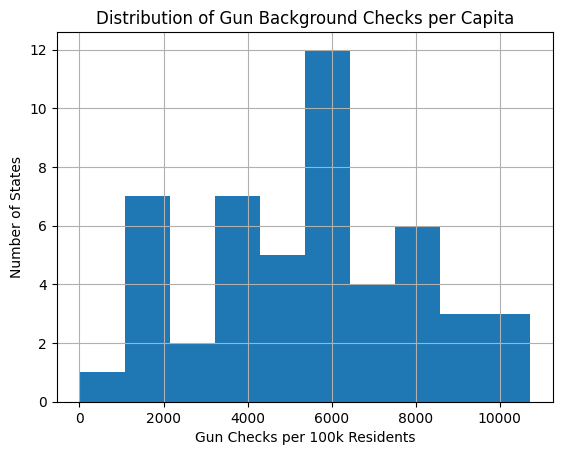

In [56]:
ax = final_df['guns_per_100k'].hist()
ax.set_title('Distribution of Gun Background Checks per Capita')
ax.set_xlabel('Gun Checks per 100k Residents')
ax.set_ylabel('Number of States');

Most states cluster around 5000–6000 checks per 100k, with smaller groups at 1000–2000 and 3000–4000. Very low rates are rare, and a few states exceed 9000, showing high variability across states.

**Variable Grouping for Analysis**

To explore which census features are most associated with higher gun background checks per capita, we organized the 34 census variables into thematic groups: population & age, gender, race & ethnicity, service & immigration, housing & living arrangements, culture & education, health & insurance, employment & labor force, and economy & income.

Grouping variables this way makes the analysis more structured and allows for more consistent interpretation. For each group, we use scatter plots to check for patterns and trends.

In [69]:
group_population_age = [
    "Population estimates, July 1, 2016,  (V2016)",
    "Persons under 5 years, percent, July 1, 2016,  (V2016)",
    "Persons under 18 years, percent, July 1, 2016,  (V2016)",
    "Persons 65 years and over, percent,  July 1, 2016,  (V2016)",
]

group_gender = [
    "Female persons, percent,  July 1, 2016,  (V2016)",
]

group_race_ethnicity = [
    "White alone, percent, July 1, 2016,  (V2016)",
    "Black or African American alone, percent, July 1, 2016,  (V2016)",
    "American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)",
    "Asian alone, percent, July 1, 2016,  (V2016)",
    "Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)",
    "Two or More Races, percent, July 1, 2016,  (V2016)",
    "Hispanic or Latino, percent, July 1, 2016,  (V2016)",
    "White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)",
]

group_service_immigration = [
    "Veterans, 2011-2015",
    "Foreign born persons, percent, 2011-2015",
]

group_housing_living = [
    "Housing units,  July 1, 2016,  (V2016)",
    "Median gross rent, 2011-2015",
    "Households, 2011-2015",
    "Persons per household, 2011-2015",
    "Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015",
]

group_culture_education = [
    "Language other than English spoken at home, percent of persons age 5 years+, 2011-2015",
    "High school graduate or higher, percent of persons age 25 years+, 2011-2015",
    "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
]

group_health_insurance = [
    "With a disability, under age 65 years, percent, 2011-2015",
    "Persons  without health insurance, under age 65 years, percent",
]

group_employment_labor = [
    "In civilian labor force, total, percent of population age 16 years+, 2011-2015",
    "In civilian labor force, female, percent of population age 16 years+, 2011-2015",
    "Total employment, 2015",
    "Total employment, percent change, 2014-2015",
]

group_economy_income = [
    "Median household income (in 2015 dollars), 2011-2015",
    "Per capita income in past 12 months (in 2015 dollars), 2011-2015",
    "Persons in poverty, percent",
    "Total health care and social assistance receipts/revenue, 2012 ($1,000)",
    "Mean travel time to work (minutes), workers age 16 years+, 2011-2015",
]

In [81]:
# Function for plotting of the different groups

def plot_group_features(data, facts):
    for fact in facts:
        ax = data.plot(
            kind='scatter',
            x=fact,
            y='guns_per_100k',
        )
        ax.set_ylabel("Gun Checks per 100k")
        ax.set_xticklabels([])
        ax.set_xticks([])

### Population & Age
We examine population size and age structure to see if certain demographic compositions relate to gun background check rates. Younger or older populations may influence household firearm demand for protection, hunting, or recreation.

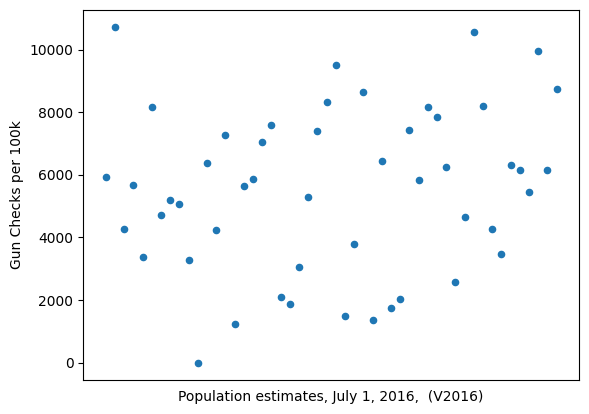

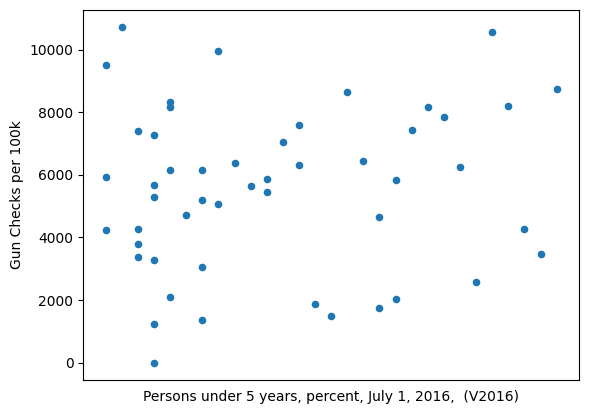

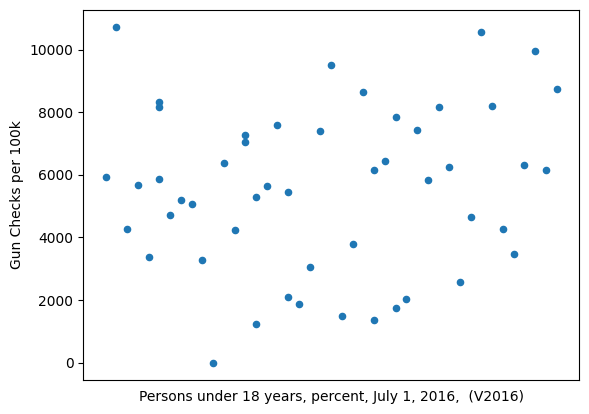

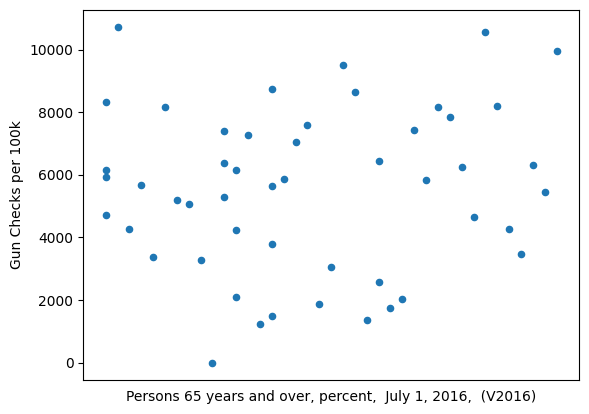

In [82]:
plot_group_features(final_df, group_population_age)

### Gender
We check if the proportion of female residents in a state correlates with gun background checks per capita, as gender distribution could reflect cultural or household firearm patterns.

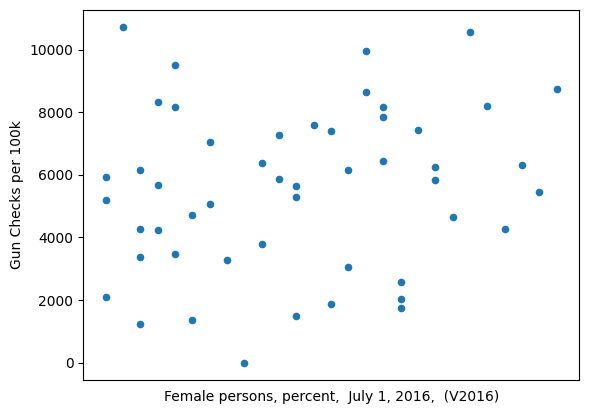

In [83]:
plot_group_features(final_df, group_gender)

### Race & Ethnicity
Race and ethnicity may influence firearm ownership patterns due to cultural, historical, or socioeconomic factors. We explore whether these demographic shares are linked to differences in gun background checks per capita.

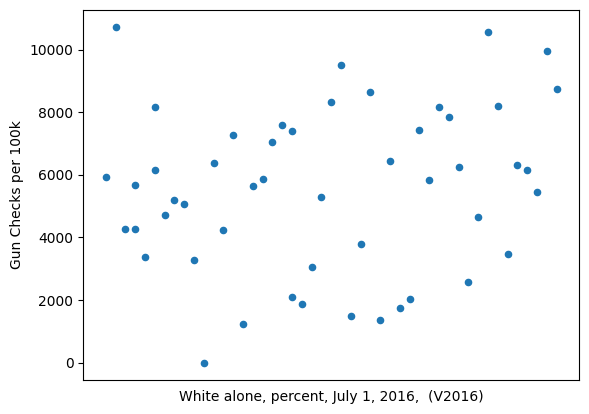

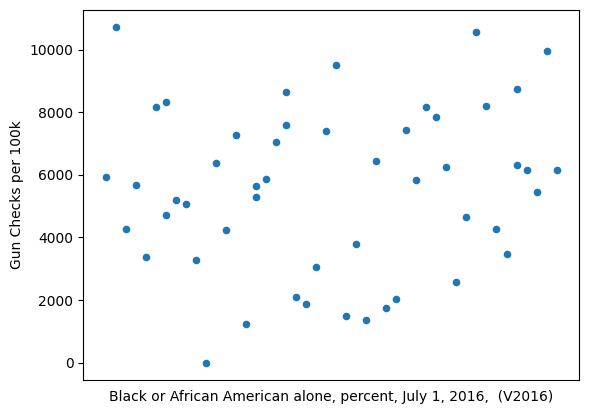

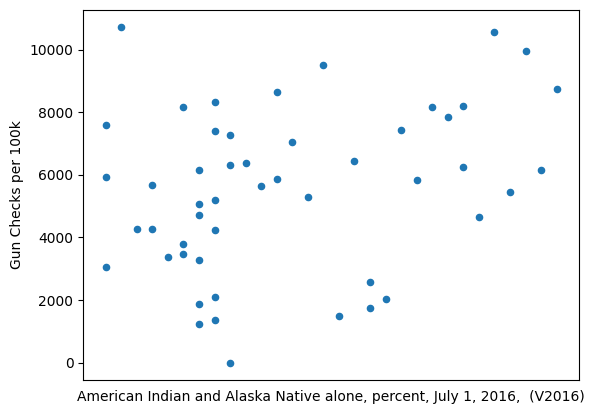

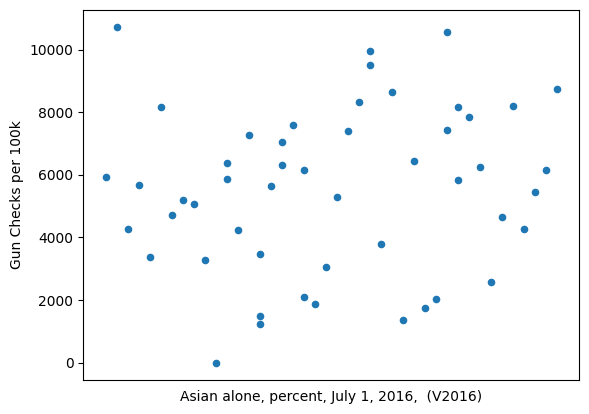

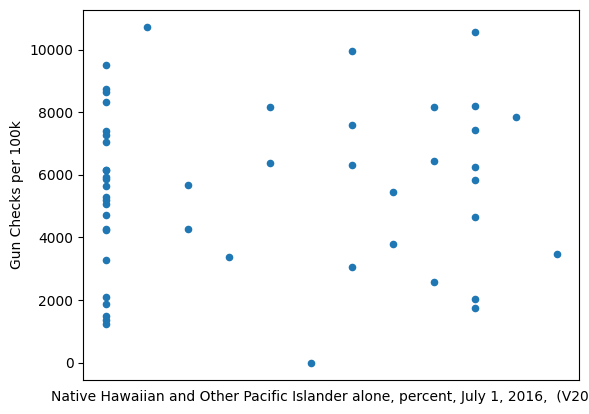

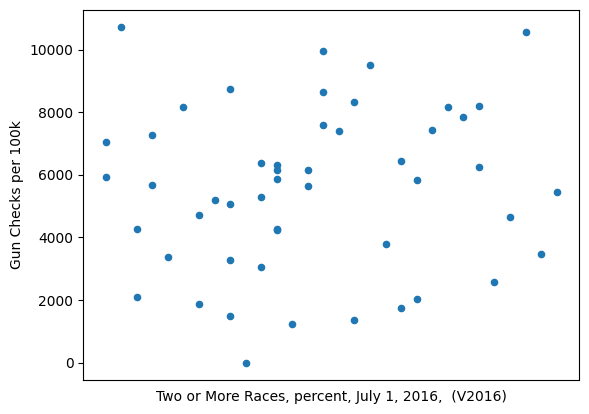

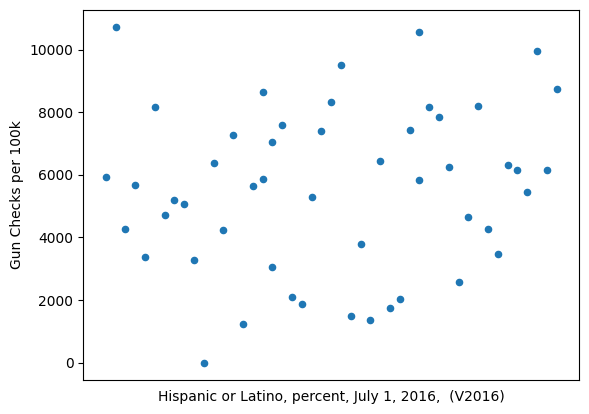

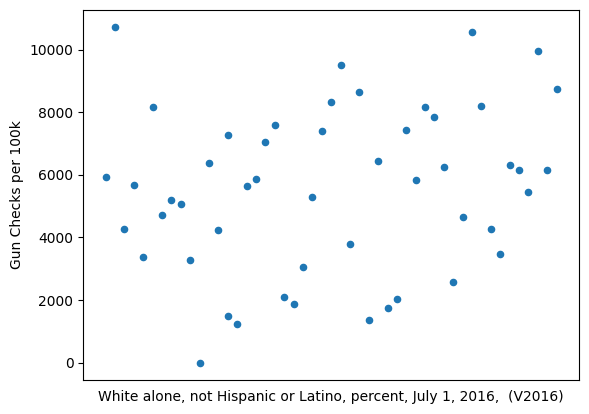

In [84]:
plot_group_features(final_df, group_race_ethnicity)

### Service & Immigration
Veteran populations often have higher familiarity with firearms, while immigration levels may reflect different cultural attitudes toward gun ownership. We test whether these factors are associated with gun background check rates.

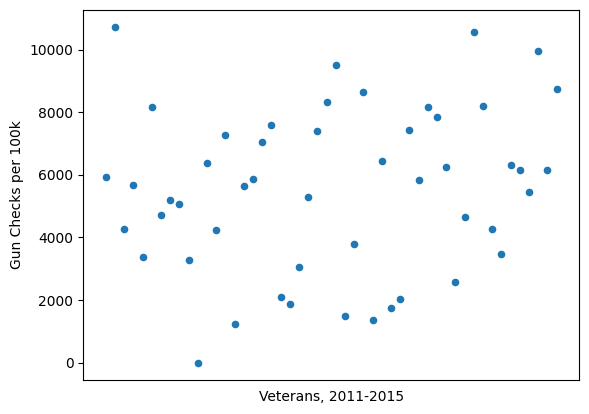

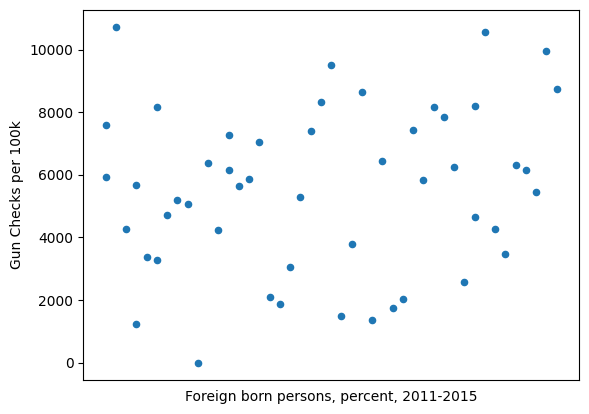

In [85]:
plot_group_features(final_df, group_service_immigration)

### Housing & Living Arrangements
Housing patterns and residential stability may influence gun ownership, through property protection needs, rural/urban differences, or community stability. We explore these potential links.

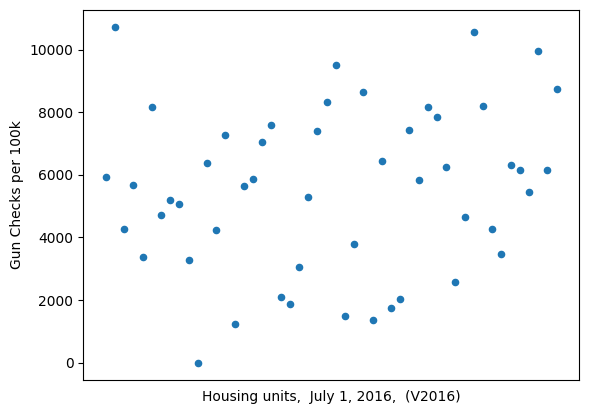

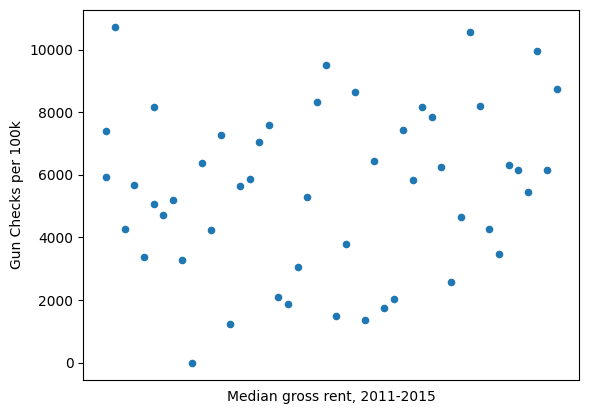

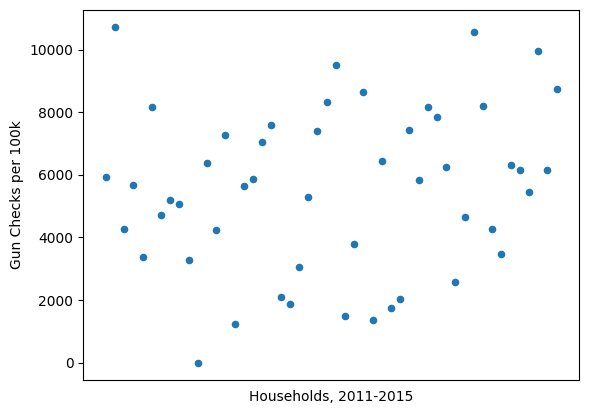

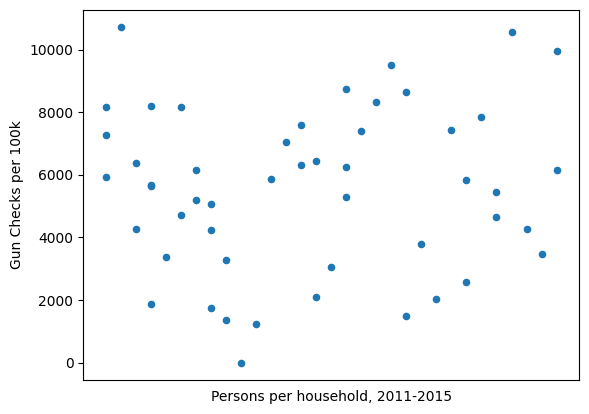

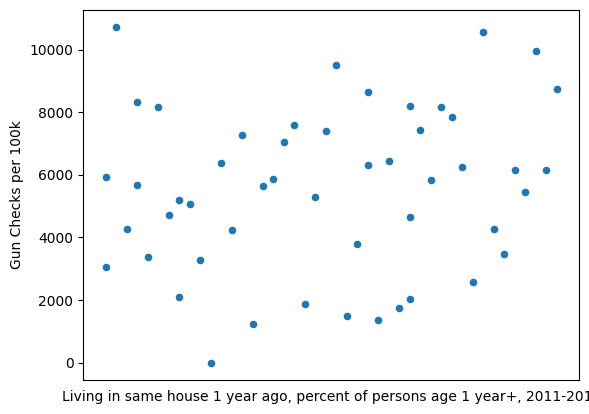

In [86]:
plot_group_features(final_df, group_housing_living)

### Culture & Education
Education level and language diversity may reflect socioeconomic or cultural differences that influence firearm demand and ownership norms. We check for patterns with gun background check rates.

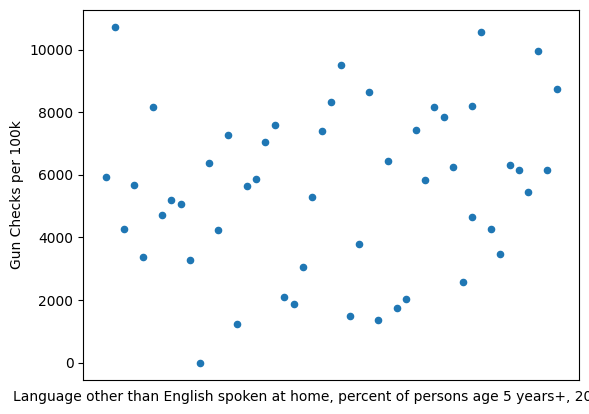

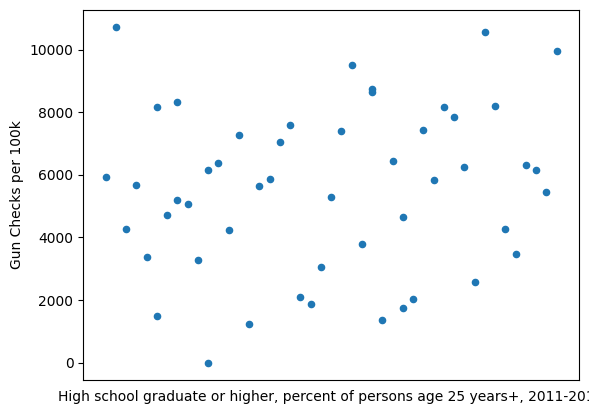

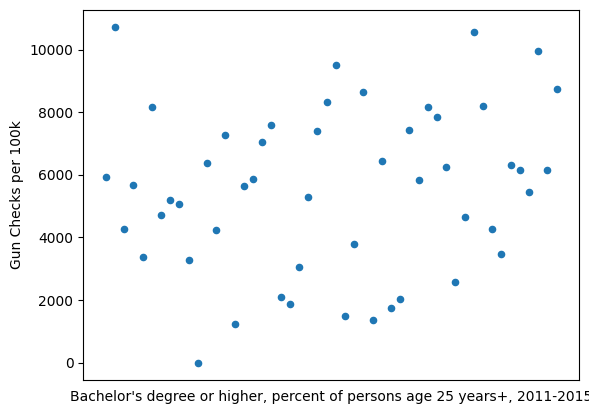

In [87]:
plot_group_features(final_df, group_culture_education)

### Health & Insurance
Health and insurance access may be proxies for socioeconomic status or rural access to services, both potentially linked to firearm ownership patterns. We investigate their association with gun background checks.

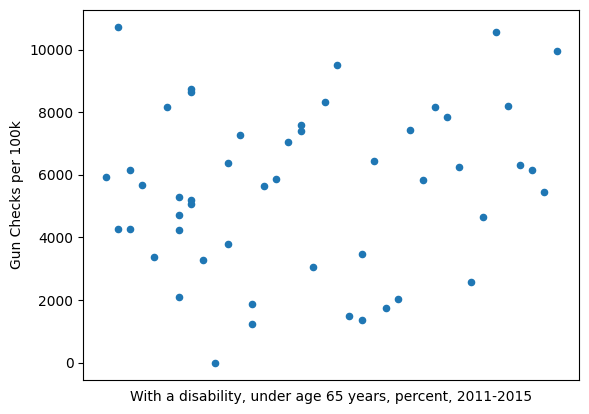

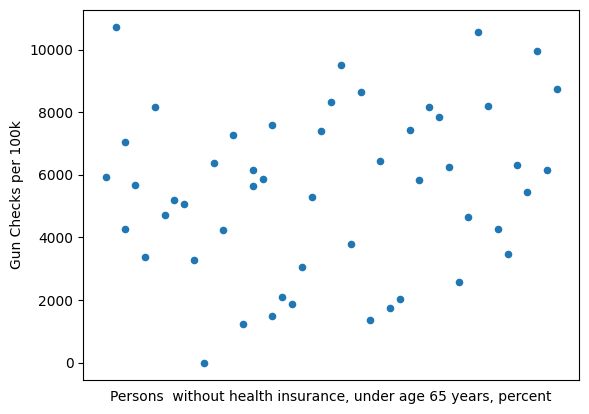

In [88]:
plot_group_features(final_df, group_health_insurance)

### Employment & Labor
Employment rates, labor force participation, and economic change could reflect economic security or instability, which may influence gun purchases. We explore these economic indicators against background check rates.

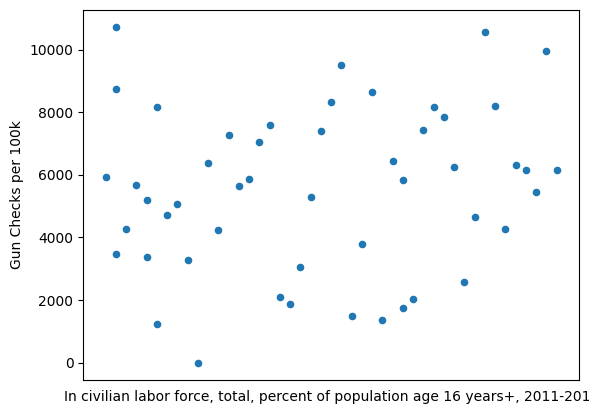

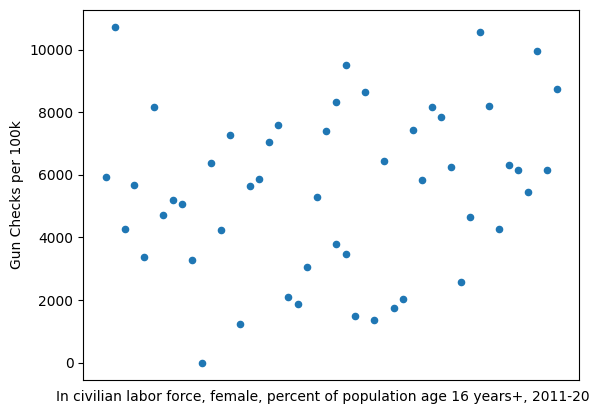

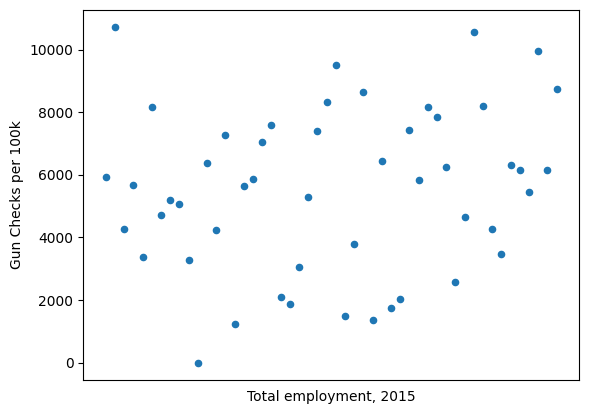

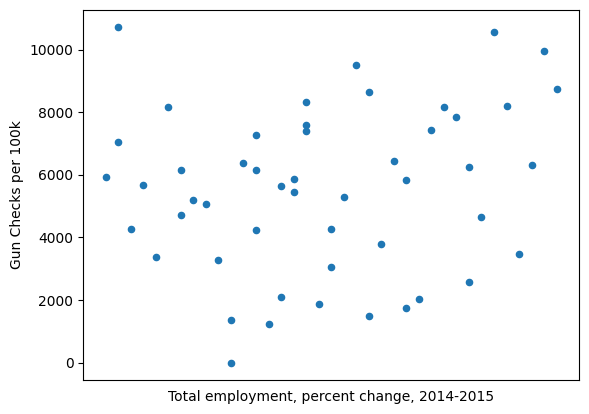

In [89]:
plot_group_features(final_df, group_employment_labor)

### Economy & Income
Income, poverty, and certain economic activity indicators may influence the affordability and perceived need for firearms. We examine whether these financial measures correlate with gun background checks per capita.

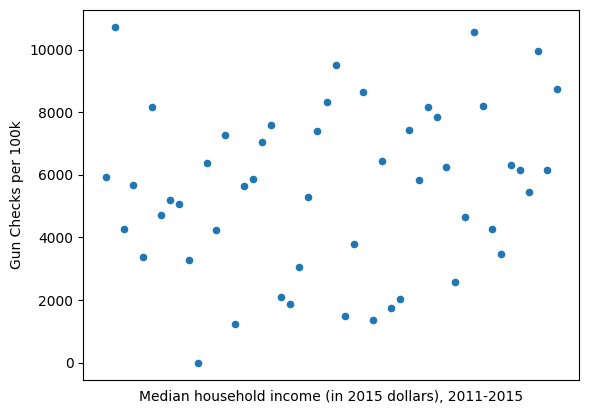

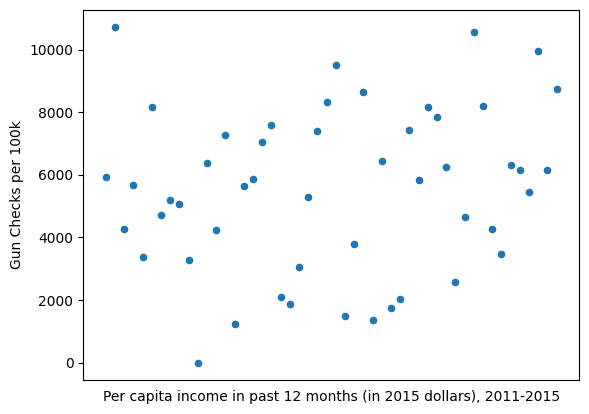

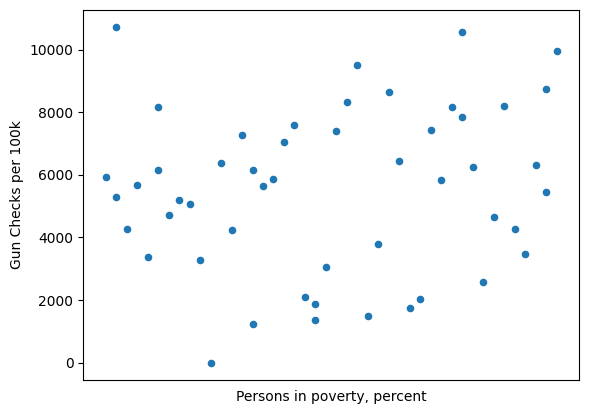

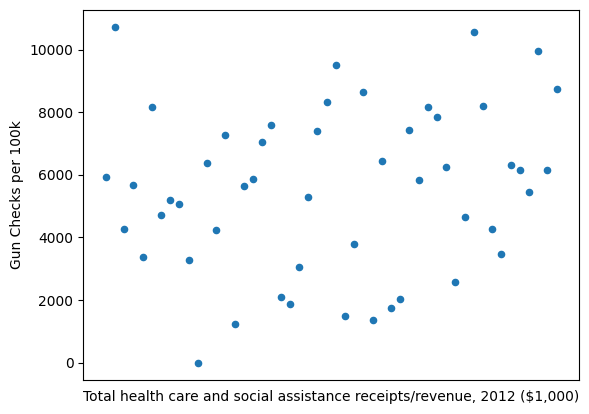

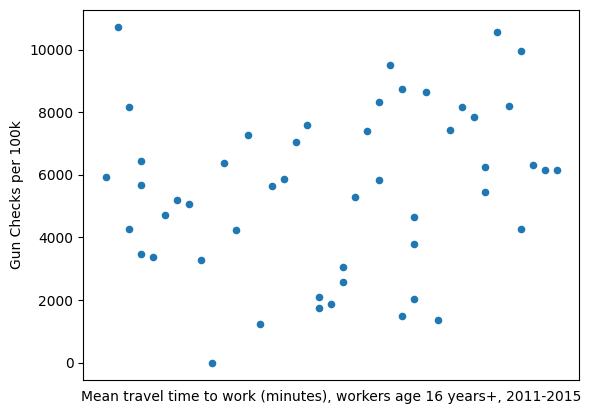

In [90]:
plot_group_features(final_df, group_economy_income)

### Conclusion

In this project, we explored the relationship between state-level census features and the number of gun background checks per capita in 2016. Our primary goal was to determine whether any demographic, social, or economic variables could be associated with higher rates of gun-related activity across U.S. states.

We computed the total number of gun background checks in 2016 for each state and normalized it by population (per 100,000 people) to allow meaningful comparisons between states of different sizes. We then examined a wide set of census variables and visualized potential relationships using scatter plots.

### Results

From the visual analysis, no strong or consistent correlation was observed between any specific census variable and the number of gun checks per capita. The data did not show any obvious trend, and most relationships appeared weak or nonexistent.

### Limitations

- **Proxy Measure**: We used total background checks per capita as a proxy for gun-related activity, but this metric does not represent actual gun ownership or purchases. One person may undergo multiple checks, and not every check results in a gun sale.
- **Background Checks vs. Ownership**: A background check does not guarantee a gun was purchased, and not all gun acquisitions require background checks.
- **Timeframe Mismatch**: The gun data spans from 1998 to 2017, but we only focused on the year 2016. Meanwhile, many census features were based on multi-year averages (2011–2015) or earlier data (e.g., 2012). While these are the most recent available, they may not perfectly reflect 2016 conditions.
- **Single-Year Census Snapshot**: The census data is limited to a single year and does not capture changes over time that might influence gun activity.

### Further Research:

Future work could explore how gun ownership correlates with factors like crime rates, poverty levels, or mental health statistics. These may offer stronger associations and deeper insights than background checks alone.

In [60]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 585940 bytes to Investigate_a_Dataset.html
